<h2 align='center'> MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510) </h2>

---
* Giảng viên: Đặng Văn Nam
* Email: dangvannam@humg.edu.n

---
* Mã sinh viên: 1821050295
* Họ và tên: Đỗ Thị Huyền
* Lớp/Nhóm môn học: DCCTPM63A / Nhóm 01
* Email: huyenjy@gmail.com

---

### CHƯƠNG 3: HỌC CÓ GIÁM SÁT (SUPERVISED LEARNING) - PHẦN 04
---

# B| Hồi quy (Regression)


Đọc dữ liệu mẫu từ Dataset của Sklearn vào Dataframe:

In [1]:
#Load dữ liệu từ datasets:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston["MEDV"] = boston.target

In [2]:
#Hiển thị 5 dòng dữ liệu đầu tiên:
df_boston.head()
#Hiển thị 5 dòng dữ liệu cuối cùng:
df_boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
#df_boston[df_boston.CHAS==1]
#Các đặc trưng thống kê của các thuộc tính độc lập (input):
#df_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
#       'PTRATIO', 'B', 'LSTAT']].describe()
#df_boston[df_boston.columns].describe()

In [3]:
#Quan sát các đặc trưng thống kê của Giá nhà tại Boston: Target (thuộc tính phụ thuộc)
df_boston[['MEDV']].describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


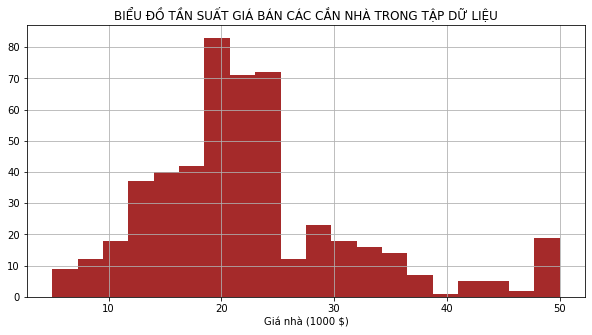

In [4]:
import matplotlib.pyplot as plt
price = df_boston[['MEDV']] #Lọc lấy dữ liệu thuộc tính giá nhà

#Vẽ biểu đồ tần suất (histogram):
plt.figure(figsize=(10,5))
plt.hist(price, bins = 20, color='brown')
plt.title('BIỂU ĐỒ TẦN SUẤT GIÁ BÁN CÁC CẮN NHÀ TRONG TẬP DỮ LIỆU')
plt.xlabel('Giá nhà (1000 $)')
plt.grid(True)
plt.show()

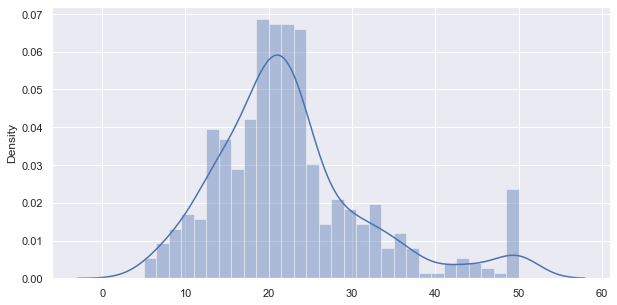

In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Sử dụng thư viện seaborn:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(price, bins=30)
plt.show()

<AxesSubplot:>

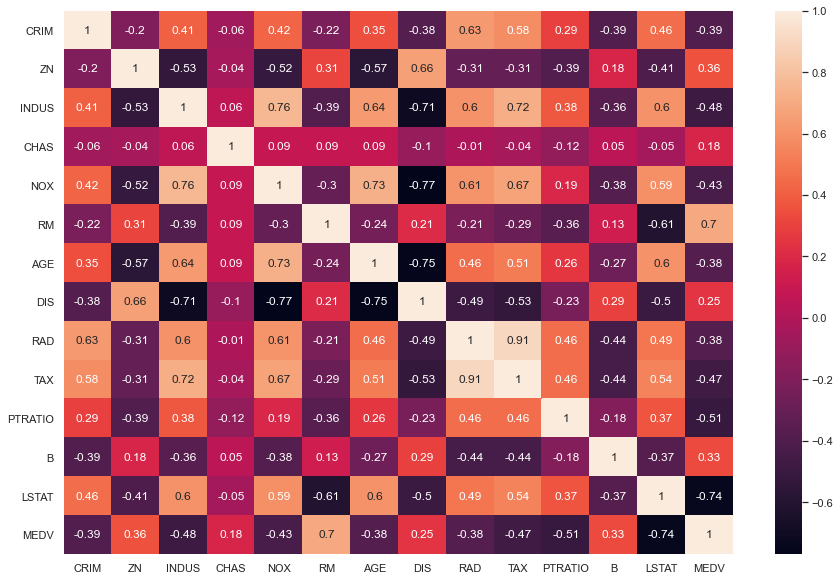

In [6]:
#Xác định mức độ ảnh hưởng của các thuộc tính tới giá bán một căn nhà:
#Xác định hệ số tương quan trong tập dữ liệu

correlation_matrix = df_boston.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=correlation_matrix, annot=True)

### Sử dụng các thuộc tính có |corr| > 0.45 để dự đoán giá nhà:
---

In [7]:
#>0.45
#df_boston.corr()[df_boston.corr()['MEDV'] <-0.45].round(2)
#df_boston.corr()[df_boston.corr()['MEDV'] > 0.45].round(2)
df_boston.corr()[df_boston.corr()['MEDV'] == 1].round(2)
#'pearson', 'spearman', 'kendall', or a callable

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.39,0.36,-0.48,0.18,-0.43,0.7,-0.38,0.25,-0.38,-0.47,-0.51,0.33,-0.74,1.0


In [8]:
#Sử dụng 5 thuộc tính 'INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT' để dự đoán giá nhà:
df_boston[['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT','MEDV']].head(10)

,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,6.575,296.0,15.3,4.98,24.0
1,7.07,6.421,242.0,17.8,9.14,21.6
2,7.07,7.185,242.0,17.8,4.03,34.7
3,2.18,6.998,222.0,18.7,2.94,33.4
4,2.18,7.147,222.0,18.7,5.33,36.2
5,2.18,6.430,222.0,18.7,5.21,28.7
6,7.87,6.012,311.0,15.2,12.43,22.9
7,7.87,6.172,311.0,15.2,19.15,27.1
8,7.87,5.631,311.0,15.2,29.93,16.5
9,7.87,6.004,311.0,15.2,17.10,18.9


In [9]:
#Tách Biến độc lập X('INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT') - Biến phụ thuộc Y (MEDV):
X_5 = df_boston[['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']].values
y_prices = df_boston[['MEDV']].values

X_5[:10,:]

array([[  2.31 ,   6.575, 296.   ,  15.3  ,   4.98 ],
       [  7.07 ,   6.421, 242.   ,  17.8  ,   9.14 ],
       [  7.07 ,   7.185, 242.   ,  17.8  ,   4.03 ],
       [  2.18 ,   6.998, 222.   ,  18.7  ,   2.94 ],
       [  2.18 ,   7.147, 222.   ,  18.7  ,   5.33 ],
       [  2.18 ,   6.43 , 222.   ,  18.7  ,   5.21 ],
       [  7.87 ,   6.012, 311.   ,  15.2  ,  12.43 ],
       [  7.87 ,   6.172, 311.   ,  15.2  ,  19.15 ],
       [  7.87 ,   5.631, 311.   ,  15.2  ,  29.93 ],
       [  7.87 ,   6.004, 311.   ,  15.2  ,  17.1  ]])

#### Tách tập dữ liệu ra làm 2 phần dùng để huấn luyện và kiểm thử mô hình theo tỷ lệ (80% - 20%)
---

In [10]:
#Tách dữ liệu Train - Test:
# Biến X_5: Lưu trữ 5 biến độc lập ('INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT')
# Biến y_prices: Lưu trữ biến phụ thuộc (MEDV)

from sklearn.model_selection import train_test_split
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, 
                                                    y_prices, 
                                                    test_size=0.2, 
                                                    random_state=50)
print("1. Kích thước tập Training: %d" %len(y_train_5))
print("2. Kích thước tập Test    : %d" %len(y_test_5))

1. Kích thước tập Training: 404
2. Kích thước tập Test    : 102


#### Khai báo sử dụng mô hình hồi quy tuyến tính và huấn luyện model với dữ liệu Huấn luyện
---

In [11]:
#Sử dụng model hồi quy tuyến tính cho bài toán 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error

#Khai báo model với các tham số mặc định:
model_5 = LinearRegression()

#Huấn luyện model:
model_5.fit(X_train_5, y_train_5)

LinearRegression()

###  Xác định các hệ số của phương trình:
---

In [12]:
#Xác định các hệ số và phương trình:
import numpy as np
w0 = float(np.round(model_5.intercept_,3))
print('w0 =',w0)

w = np.round(model_5.coef_,3)
print('w = ', w)

w0 = 16.271
w =  [[ 0.06   4.934 -0.005 -0.911 -0.506]]


**Phương trình siêu phẳng:**
$$ ŷ_{MEDV} = f(x) = 16.271 + 0.06.X_{INDUS} + 4.934.X_{RM} + (-0.005).X_{TAX} + (-0.911).X_{PTRATIO}+ (-0.506).X_{LSTAT} $$

In [13]:
#Sử dụng model huấn luyện được trên tập Train để dự đoán trên tập Test
y_pred = model_5.predict(X_test_5)
y_pred = np.round(y_pred,1).ravel()

print('Giá nhà dự đoán: y^ = ', y_pred[:10])
print('Giá nhà dự đoán: y  = ', y_pred[:10].ravel())

Giá nhà dự đoán: y^ =  [ 9.3 25.4 19.4 28.5 25.2 19.8 22.5 15.  10.7 26.6]
Giá nhà dự đoán: y  =  [ 9.3 25.4 19.4 28.5 25.2 19.8 22.5 15.  10.7 26.6]


### Đánh giá độ chính xác của mô hình hồi quy
---

**A.Model sử dụng các tham số mặc định:**

In [14]:
#Tính các sai số:
mae_5 = mean_absolute_error(y_test_5, y_pred)
mse_5 = mean_squared_error(y_test_5, y_pred)
rmse_5 = (np.sqrt(mean_squared_error(y_test_5, y_pred)))
r2_5 = r2_score(y_test_5, y_pred)

print('MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI 2 THUỘC TÍNH RM và LSTAT:')
print("Độ chính xác của mô hình trên tập TEST:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',mae_5)
print('2.Sai số MSE  = ',mse_5)
print('3.Sai số RMSE = ',rmse_5)
print('4.Sai số R2   = ',r2_5)

MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI 2 THUỘC TÍNH RM và LSTAT:
Độ chính xác của mô hình trên tập TEST:
--------------------------------------------
1.Sai số MAE  =  3.63921568627451
2.Sai số MSE  =  32.30156862745098
3.Sai số RMSE =  5.683446896686111
4.Sai số R2   =  0.5799297569492445


**B. Model thay đổi tham số:**

In [15]:
#Xây dựng model mới
model_5new = LinearRegression(fit_intercept=False, normalize=True)

#Huấn luyện model:
model_5new.fit(X_train_5, y_train_5)

w0 = np.round(model_5new.intercept_,3)

#Sử dụng model huấn luyện được trên tập Train để dự đoán trên tập Test
y_pred = model_5new.predict(X_test_5)
y_pred = np.round(y_pred,1).ravel()

#Đánh giá sai số MAE, MSE, RMSE, R2 trên tập test:
#Tính các sai số:
mae_5 = mean_absolute_error(y_test_5, y_pred)
mse_5 = mean_squared_error(y_test_5, y_pred)
rmse_5 = (np.sqrt(mean_squared_error(y_test_5, y_pred)))
r2_5 = r2_score(y_test_5, y_pred)

print('MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI 5 THUỘC TÍNH:')
print("Độ chính xác của mô hình trên tập TEST:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',mae_5)
print('2.Sai số MSE  = ',mse_5)
print('3.Sai số RMSE = ',rmse_5)
print('4.Sai số R2   = ',r2_5)

MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI 5 THUỘC TÍNH:
Độ chính xác của mô hình trên tập TEST:
--------------------------------------------
1.Sai số MAE  =  3.5598039215686277
2.Sai số MSE  =  34.11264705882354
3.Sai số RMSE =  5.840603312914133
4.Sai số R2   =  0.5563773355289389


## THỰC HÀNH 9
---
### Yêu cầu 1: 
Sinh viên tìm hiểu về tập dữ liệu mẫu Diabetes Dataset của Sklearn (xác định các features đầu vào (input) và label đầu ra (target))


In [1]:
#{Sinh viên viết code ở đây!}
#Khai báo các thư viện cần dùng
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Dự đoán mức độ bệnh tiến triển của bệnh nhân đái tháo đường
---
Tập dữ liệu bao gồm 10 thuộc tính cơ bản: tuổi, giới tính, chỉ số khối cơ thể, huyết áp trung bình và sáu phép đo huyết thanh đã được thu được của 442 bệnh nhân đái tháo đường, và `target`, một thước đo định lượng về sự tiến triển của bệnh một năm sau thời điểm ban đầu. Các thông số bao gồm:

1. 'age': tuổi của bệnh nhân
2. 'sex': giới tính của bệnh nhân
3. 'bmi': chỉ số khối cơ thể BMI của bệnh nhân
4. 'bp': huyết áp trung bình của bệnh nhân
5. 's1': tổng lượng cholesterol trong huyết thanh của bệnh nhân
6. 's2': lipoproteins mật độ thấp
7. 's3': lipoproteins mật độ cao
8. 's4': tổng cholesterol / HDL(s3) của bệnh nhân
9. 's5': mức chất béo trung tính trong huyết thanh của bệnh nhân
10. 's6': mức đường huyết của bệnh nhân

'target': mức độ tiến triển của bệnh một năm sau thời điểm ban đầu của bệnh nhân

### A. Chuẩn bị dữ liệu
---
Đọc dữ liệu mẫu từ Dataset của Sklearn vào Dataframe:

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes["target"] = diabetes.target
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [3]:
#Hiển thị 5 dòng dữ liệu đầu tiên:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
#Các đặc trưng thống kê của các thuộc tính độc lập (input):
df_diabetes[df_diabetes.columns].describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [5]:
# input
X_train = df_diabetes.drop(['target'], axis = 1)
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
#Quan sát các đặc trưng thống kê của Target (thuộc tính phụ thuộc)
df_diabetes[['target']].describe()

,target
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [7]:
# output
y_train = df_diabetes[['target']]
y_train

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


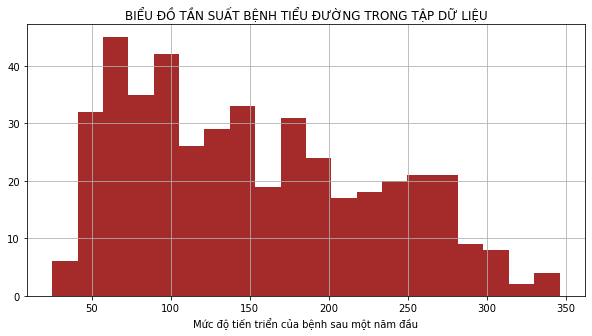

In [8]:
target = df_diabetes[['target']] #Lọc lấy dữ liệu thuộc tính phụ thuộc

#Vẽ biểu đồ tần suất (histogram):
plt.figure(figsize=(10,5))
plt.hist(target, bins = 20, color='brown')
plt.title('BIỂU ĐỒ TẦN SUẤT BỆNH TIỂU ĐƯỜNG TRONG TẬP DỮ LIỆU')
plt.xlabel('Mức độ tiến triển của bệnh sau một năm đầu')
plt.grid(True)
plt.show()

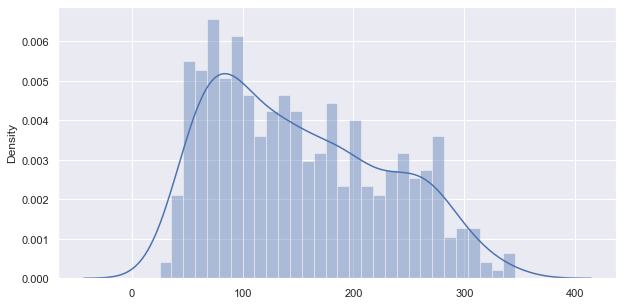

In [9]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Sử dụng thư viện seaborn:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(target, bins=30)
plt.show()

<AxesSubplot:>

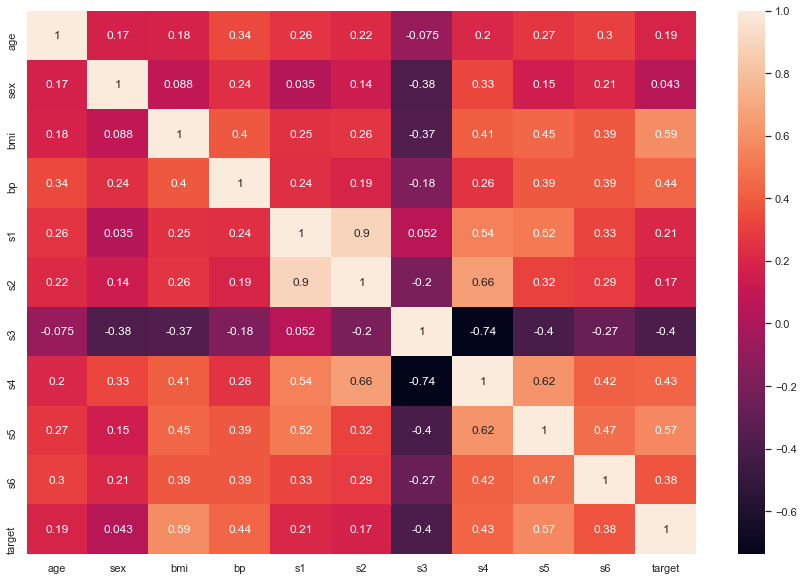

In [10]:
#Xác định mức độ ảnh hưởng của các thuộc tính tới Mức độ tiến triển của bệnh sau một năm đầu:
#Xác định hệ số tương quan trong tập dữ liệu

correlation_matrix = df_diabetes.corr().round(3)
# annot = True to print the values inside the square
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=correlation_matrix, annot=True)

**Yêu cầu 2:**
---
* Trong tập dữ liệu Diabetes xác định thuộc tính có ảnh hưởng lớn nhất (hệ số tương quan cao nhất) tới thuộc tính target.
* Tách tập dữ liệu thành 2 phần Train – Test với tỷ lệ 75%-25%

**Mức độ ảnh hưởng của 10 thuộc tính tới Mức độ tiến triển của bệnh sau một năm đầu là khác nhau:**
1. 'age': tuổi của bệnh nhân (0.19)
2. 'sex': giới tính của bệnh nhân (0.043)
3. 'bmi': chỉ số khối cơ thể BMI của bệnh nhân (0.59)
4. 'bp': huyết áp trung bình của bệnh nhân (0.44)
5. 's1': tổng lượng cholesterol trong huyết thanh của bệnh nhân (0.21)
6. 's2': lipoproteins mật độ thấp (0.17)
7. 's3': lipoproteins mật độ cao (-0.4)
8. 's4': tổng cholesterol / HDL(s3) của bệnh nhân (0.43)
9. 's5': mức chất béo trung tính trong huyết thanh của bệnh nhân (0.57)
10. 's6': mức đường huyết của bệnh nhân (0.38)

Thuộc tính ảnh hưởng mạnh nhất tới Mức độ tiến triển của bệnh sau một năm đầu:

    * bmi (0.59): chỉ số khối cơ thể BMI của bệnh nhân - Tương quan thuận

#### Tách tập dữ liệu ra làm 2 phần dùng để huấn luyện và kiểm thử mô hình theo tỷ lệ (75% - 25%)
---

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.25, 
                                                    random_state=48)

print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 331
2. Kích thước tập Test    : 111


### Yêu cầu 3:
---
* 1) Xây dựng mô hình hồi quy tuyến tính đơn giản (Simple Linear Regression) với thuộc tính có ảnh hưởng cao nhất tới thuộc tính Target. Xác định sai số RMSE và R2 trên tập Train và Test.
* 2) Xây dựng mô hình hồi quy tuyến tính với tất các thuộc tính đầu vào (input). Xác định sai số RMSE và R2  trên tập Train và Test.
* 3) Xây dựng mô hình hồi quy tuyến tính với các thuộc tính đầu vào (input) có hệ số tương quan >|0.5|. Xác định sai số RMSE và R2 trên tập Train và Test.


**1. Model hồi quy tuyến tính đơn giản với một tham số: bmi**

In [13]:
#Dữ liệu tỷ lệ phần trăm chỉ số khối cơ thể BMI của bệnh nhân (bmi) 
#với Mức độ tiến triển của bệnh sau một năm đầu (target):
df_diabetes[['bmi','target']].head(10)

,bmi,target
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0
5,-0.040696,97.0
6,-0.047163,138.0
7,-0.001895,63.0
8,0.061696,110.0
9,0.039062,310.0


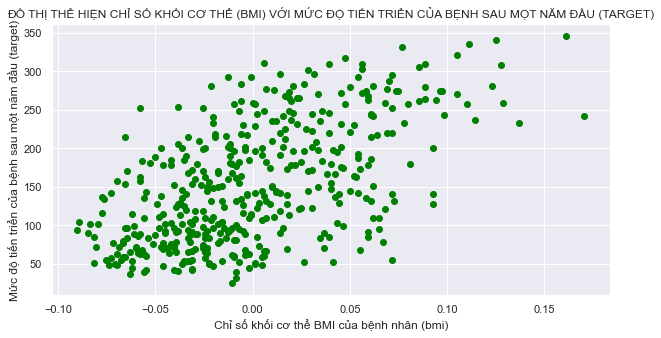

In [14]:
#Trực quan hóa dữ liệu chỉ số khối cơ thể BMI của bệnh nhân (bmi) 
#với Mức độ tiến triển của bệnh sau một năm đầu (target):
plt.figure(figsize=(10,5))
plt.scatter(df_diabetes['bmi'],
            df_diabetes['target'],
            marker='o', 
            color='green')
plt.title('ĐỒ THỊ THỂ HIỆN CHỈ SỐ KHỐI CƠ THỂ (BMI) VỚI MỨC ĐỘ TIẾN TRIỂN CỦA BỆNH SAU MỘT NĂM ĐẦU (TARGET)')
plt.xlabel('Chỉ số khối cơ thể BMI của bệnh nhân (bmi)')
plt.ylabel('Mức độ tiến triển của bệnh sau một năm đầu (target)')
plt.grid(True)
plt.show()

In [15]:
#Tách dữ liệu biến độc X(bmi) - Biến phụ thuộc Y(target) để xây dựng mô hình hồi quy
X_bmi = df_diabetes['bmi'].values

#Tách biến phụ thuộc:
y_target = df_diabetes['target'].values

#Hiển thị 8 bộ tham số đầu tiên:
print('Chỉ số khối cơ thể bmi của bệnh nhân      : ', X_bmi[:8])
print('Mức độ tiến triển của bệnh sau một năm đầu: ', y_target[:8])

Chỉ số khối cơ thể bmi của bệnh nhân      :  [ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471]
Mức độ tiến triển của bệnh sau một năm đầu:  [151.  75. 141. 206. 135.  97. 138.  63.]


In [16]:
#Chia tập dữ liệu Train - Test:
X_train, X_test, y_train, y_test = train_test_split(X_bmi, 
                                                    y_target, 
                                                    test_size=0.25, 
                                                    random_state=48)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 331
2. Kích thước tập Test    : 111


In [17]:
#Khởi tạo mô hình hồi quy tuyến tính với các tham số mặc định:
model_1 = LinearRegression()
#Danh sách các tham số:
model_1.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [18]:
#Huấn luyện model:
model_1.fit(X_train, y_train)

#Lấy các hệ số của phương trình:
#hệ số w1:
w1 = model_1.coef_
print('w1 = ',w1)
#Hệ số w0 (bias):
w0 = model_1.intercept_
print('w0 = ',w0)

w1 =  [[940.19952941]]
w0 =  [148.19194345]


In [19]:
#Đánh giá độ chính xác trên tập Train:
y_pred = model_1.predict(X_train)
y_pred = y_pred.reshape(-1,1)

#Tính các sai số:
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred)))
r2_train = r2_score(y_train, y_pred)

print('1. MÔ HÌNH HỒI QUY TUYẾN TÍNH ĐƠN GIẢN VỚI MỘT THAM SỐ: BMI')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")

print('*) Sai số RMSE = ',rmse_train)
print('*) Sai số R2   = ',r2_train)

# Đánh giá độ chính xác trên tập TEST:
y_pred =model_1.predict(X_test)
y_pred.reshape(1,-1)

#Tính các sai số:
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2_test = r2_score(y_test, y_pred)

print("\nĐộ chính xác của mô hình trên Kiểm thử:")
print("--------------------------------------------")
print('*) Sai số RMSE = ',rmse_test)
print('*) Sai số R2   = ',r2_test)

1. MÔ HÌNH HỒI QUY TUYẾN TÍNH ĐƠN GIẢN VỚI MỘT THAM SỐ: BMI
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
*) Sai số RMSE =  60.98244300895994
*) Sai số R2   =  0.3483566427002216

Độ chính xác của mô hình trên Kiểm thử:
--------------------------------------------
*) Sai số RMSE =  66.81909100184552
*) Sai số R2   =  0.28778772893929616


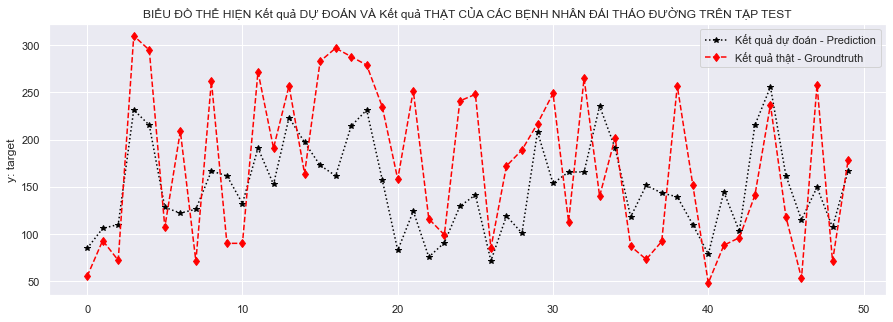

In [20]:
#Trực quan hóa kết quả
plt.figure(figsize=(15,5))
plt.plot(y_pred[:50], marker='*',color ='black', linestyle=':', label='Kết quả dự đoán - Prediction')
plt.plot(y_test[:50], marker='d', color='red', linestyle='--', label='Kết quả thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN Kết quả DỰ ĐOÁN VÀ Kết quả THẬT CỦA CÁC BỆNH NHÂN ĐÁI THÁO ĐƯỜNG TRÊN TẬP TEST')
plt.ylabel("y: target")
plt.legend()
plt.show()

**2. Model hồi quy tuyến tính với tất các thuộc tính đầu vào**

In [21]:
#Đọc dữ liệu vào các độc lập và phụ thuộc
X_train = df_diabetes.iloc[:,:10].values
y_train = df_diabetes.iloc[:, -1].values

#Chia tập dữ liệu Train - Test:
X_train, X_test, y_train, y_test = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.25, 
                                                    random_state=48)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 331
2. Kích thước tập Test    : 111


In [22]:
#Khởi tạo mô hình hồi quy tuyến tính với các tham số mặc định:
model_2 = LinearRegression()

#Huấn luyện model:
model_2.fit(X_train, y_train)

#Lấy các hệ số của phương trình:
w0 = np.round(model_2.intercept_,3)
print('w0 =',w0)
dem=1
for i in model_2.coef_:
    x = 'w'+str(dem)
    print(x,'=',np.round(i,3))
    dem=dem+1

w0 = 148.936
w1 = 46.708
w2 = -223.804
w3 = 530.424
w4 = 288.139
w5 = -844.069
w6 = 493.382
w7 = 153.911
w8 = 219.339
w9 = 736.769
w10 = 47.621


In [23]:
#Các hệ số ứng với từng biến độc lập:
coeff_df = pd.DataFrame(np.round(model_2.coef_,3), 
                        list(df_diabetes.columns[:10]), 
                        columns =['Coefficient'])
coeff_df

,Coefficient
age,46.708
sex,-223.804
bmi,530.424
bp,288.139
s1,-844.069
s2,493.382
s3,153.911
s4,219.339
s5,736.769
s6,47.621


In [24]:
#Đánh giá độ chính xác trên tập Train:
y_pred = model_2.predict(X_train)

#Tính các sai số:
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred)))
r2_train = r2_score(y_train, y_pred)

print('2. MÔ HÌNH HỒI QUY TUYẾN TÍNH VỚI TẤT CẢ CÁC THUỘC TÍNH ĐẦU VÀO')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")

print('*) Sai số RMSE = ',rmse_train)
print('*) Sai số R2   = ',r2_train)

# Đánh giá độ chính xác trên tập TEST:
y_pred = model_2.predict(X_test)

#Tính các sai số:
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2_test = r2_score(y_test, y_pred)

print("\nĐộ chính xác của mô hình trên Kiểm thử:")
print("--------------------------------------------")
print('*) Sai số RMSE = ',rmse_test)
print('*) Sai số R2   = ',r2_test)

2. MÔ HÌNH HỒI QUY TUYẾN TÍNH VỚI TẤT CẢ CÁC THUỘC TÍNH ĐẦU VÀO
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
*) Sai số RMSE =  53.68576904406424
*) Sai số R2   =  0.49496823735261697

Độ chính xác của mô hình trên Kiểm thử:
--------------------------------------------
*) Sai số RMSE =  53.63273651925497
*) Sai số R2   =  0.541152638326353


**3. Model hồi quy tuyến tính với tất các thuộc tính đầu vào có hệ số tương quan >|0.5|**

In [25]:
df_diabetes.corr()[df_diabetes.corr()['target'] == 1].round(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
target,0.19,0.04,0.59,0.44,0.21,0.17,-0.39,0.43,0.57,0.38,1.0


In [26]:
#Sử dụng 2 thuộc tính 'bmi', 's5' để dự đoán:
df_diabetes[['bmi', 's5', 'target']].head(10)

,bmi,s5,target
0,0.061696,0.019908,151.0
1,-0.051474,-0.068330,75.0
2,0.044451,0.002864,141.0
3,-0.011595,0.022692,206.0
4,-0.036385,-0.031991,135.0
5,-0.040696,-0.041180,97.0
6,-0.047163,-0.062913,138.0
7,-0.001895,-0.035817,63.0
8,0.061696,-0.014956,110.0
9,0.039062,0.067736,310.0


In [27]:
#Đọc dữ liệu vào các độc lập và phụ thuộc
X_train = df_diabetes[['bmi','s5']].values
y_train = df_diabetes[['target']].values

#Chia tập dữ liệu Train - Test:
X_train, X_test, y_train, y_test = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.25, 
                                                    random_state=48)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 331
2. Kích thước tập Test    : 111


In [28]:
#Khởi tạo mô hình hồi quy tuyến tính với các tham số mặc định:
model_3 = LinearRegression()

#Huấn luyện model:
model_3.fit(X_train, y_train)

#Xác định các hệ số và phương trình MẶT PHẲNG:
w = np.round(model_3.coef_,3)
print('w = ', w)

w0 = np.round(model_3.intercept_,3)
print('w0 = ', w0)

print('Phương trình mặt phẳng: Y^ = ', w0 , ' + ' , w[0,0] , ' * x_bmi + ',w[0,1], '* x_s5' )

w =  [[685.849 571.743]]
w0 =  [148.75]
Phương trình mặt phẳng: Y^ =  [148.75]  +  685.849  * x_bmi +  571.743 * x_s5


In [29]:
#Đánh giá độ chính xác trên tập Train:
y_pred = model_3.predict(X_train)

#Tính các sai số:
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred)))
r2_train = r2_score(y_train, y_pred)

print('3. MÔ HÌNH HỒI QUY TUYẾN TÍNH VỚI TẤT CẢ CÁC THUỘC TÍNH ĐẦU VÀO CÓ HỆ SỐ TƯƠNG QUAN > |0.5|')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")

print('*) Sai số RMSE = ',rmse_train)
print('*) Sai số R2   = ',r2_train)

# Đánh giá độ chính xác trên tập TEST:
y_pred = model_3.predict(X_test)

#Tính các sai số:
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2_test = r2_score(y_test, y_pred)

print("\nĐộ chính xác của mô hình trên Kiểm thử:")
print("--------------------------------------------")
print('*) Sai số RMSE = ',rmse_test)
print('*) Sai số R2   = ',r2_test)

3. MÔ HÌNH HỒI QUY TUYẾN TÍNH VỚI TẤT CẢ CÁC THUỘC TÍNH ĐẦU VÀO CÓ HỆ SỐ TƯƠNG QUAN > |0.5|
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
*) Sai số RMSE =  56.2790844091037
*) Sai số R2   =  0.4449982121681849

Độ chính xác của mô hình trên Kiểm thử:
--------------------------------------------
*) Sai số RMSE =  58.11857235403437
*) Sai số R2   =  0.4611868321472413


In [ ]:
1. MÔ HÌNH HỒI QUY TUYẾN TÍNH ĐƠN GIẢN VỚI MỘT THAM SỐ: BMI
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
*) Sai số RMSE =  60.98244300895994
*) Sai số R2   =  0.3483566427002216

Độ chính xác của mô hình trên Kiểm thử:
--------------------------------------------
*) Sai số RMSE =  66.81909100184552
*) Sai số R2   =  0.28778772893929616

2. MÔ HÌNH HỒI QUY TUYẾN TÍNH VỚI TẤT CẢ CÁC THUỘC TÍNH ĐẦU VÀO
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
*) Sai số RMSE =  53.68576904406424
*) Sai số R2   =  0.49496823735261697

Độ chính xác của mô hình trên Kiểm thử:
--------------------------------------------
*) Sai số RMSE =  53.63273651925497
*) Sai số R2   =  0.541152638326353

# SINH VIÊN THAM KHẢO THÊM

## II) THUẬT TOÁN KNN CHO BÀI TOÁN HỒI QUY (KNN Regression)
---
* Tương tự như đối với bài toán phân lớp. Xác định những điểm dữ liệu gần nhất với điểm dữ liệu mới!
* Nhãn của điểm dữ liệu mới được là nhãn của điểm dữ liệu đã biết gần nhất (K=1) hoặc trung bình có trọng số của những điểm gần nhất.
<img src='pic/knn_regression.png' width='600px'>

Cho tập huấn luyện $(x_i,y_i)$. Dự báo giá trị tại mẫu $x$.

- Tìm $k$ lân cận gần nhất với $x$ từ mẫu $x_i$ của tập huấn luyện 

- Ký hiệu $N(x)=\{x_{i_1},\dots,x_{i_k}\}$ là tập mẫu tìm được

- Giá trị dự báo của $x$ là $y=f(x)=Average(y_i: x_i\in N(x))$

## Ví dụ: Dự đoán giá nhà với thuật toán KNN
---
### A) Sử dụng một biến độc lập RM để dự đoán giá nhà

In [1]:
#Load dữ liệu từ datasets:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston["MEDV"] = boston.target
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


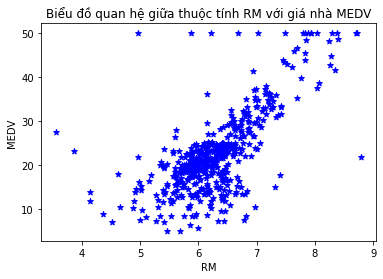

In [2]:
import matplotlib.pyplot as plt
#Trực quan hóa mối quan hệ giữa giá nhà với số phòng trung bình
plt.scatter(df_boston['RM'],df_boston['MEDV'],marker='*', color='Blue')
plt.title('Biểu đồ quan hệ giữa thuộc tính RM với giá nhà MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [3]:
#Lấy dữ liệu input và target.
X_rm = df_boston['RM'].values
y_prices =  df_boston['MEDV'].values

In [4]:
#tách tỷ lệ Train - Test
#Sử dụng thuộc tính RM để dự đoán
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rm, 
                                                    y_prices, 
                                                    test_size=0.2, 
                                                    random_state=50)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 404
2. Kích thước tập Test    : 102


In [5]:
#Khai báo sử dụng thuật toán hồi quy KNN
from sklearn.neighbors import KNeighborsRegressor

#Trường hợp với n = 8
knn_reg = KNeighborsRegressor(n_neighbors=8)

#Huấn luyện model
knn_reg.fit(X_train,y_train)
print(knn_reg)

KNeighborsRegressor(n_neighbors=8)


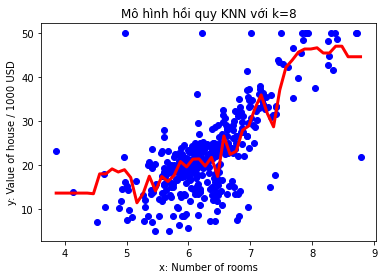

In [6]:
import numpy as np
xx=np.linspace(min(X_train),max(X_train)).reshape(-1,1)
plt.scatter(X_train,y_train,color="blue")
plt.plot(xx,knn_reg.predict(xx),color="red",linewidth=3)
plt.title('Mô hình hồi quy KNN với k=8')
plt.ylabel("y: Value of house / 1000 USD")
plt.xlabel("x: Number of rooms")
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
# model evaluation for training set
y_train_predict = knn_reg.predict(X_train)
y_train_predict = y_train_predict.reshape(-1,1)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('A) MÔ HÌNH HỒI QUY KNN SỬ DỤNG 1 BIẾN ĐỘC LẬP-RM')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = knn_reg.predict(X_test)
y_test_predict = y_test_predict.reshape(-1,1)

y_test = y_test.reshape(-1,1)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Độ chính xác của mô hình trên tập kiểm thử:")
print("-------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))

A) MÔ HÌNH HỒI QUY KNN SỬ DỤNG 1 BIẾN ĐỘC LẬP-RM
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
Sai số RMSE 5.552424857451789
Sai số R2   0.6427821247691501


Độ chính xác của mô hình trên tập kiểm thử:
-------------------------------------------
Sai số RMSE 6.160400151330253
Sai số R2   0.5064670525705411


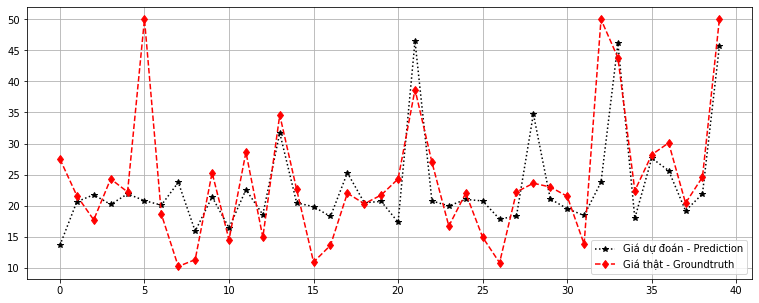

In [8]:
#Trực quan hóa kết quả dự đoán với kết quả groudtruth
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
plt.plot(y_test_predict[:40], marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test[:40], marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.legend()
plt.grid(True)

### B) Sử dụng tất cả các biến để dự đoán giá nhà
---

In [10]:
# Biến X_boston: Lưu trữ 13 biến độc lập (input)
# Biến y_boston: Lưu trữ biến phụ thuộc (target)
X_boston = df_boston.iloc[:,:13].values
y_boston = df_boston.iloc[:, -1].values
# Tách tập dữ liệu theo tỷ lệ 80%- 20%
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train, y_test = train_test_split(X_boston, 
                                                    y_boston, 
                                                    test_size=0.2, 
                                                    random_state=50)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 404
2. Kích thước tập Test    : 102


In [11]:
#Sử dụng thuật toán hồi quy KNN với k=3
knn_reg_all = KNeighborsRegressor(n_neighbors = 3)

#Huấn luyện
knn_reg_all.fit(X_train_all,y_train)

KNeighborsRegressor(n_neighbors=3)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
# model evaluation for training set
y_train_predict = knn_reg_all.predict(X_train_all)
y_train_predict = y_train_predict.reshape(-1,1)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('B) MÔ HÌNH HỒI QUY KNN SỬ DỤNG TẤT CẢ BIẾN ĐỘC LẬP:')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = knn_reg_all.predict(X_test_all)
y_test_predict = y_test_predict.reshape(-1,1)

y_test = y_test.reshape(-1,1)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Độ chính xác của mô hình trên tập kiểm thử:")
print("-------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))

B) MÔ HÌNH HỒI QUY KNN SỬ DỤNG TẤT CẢ BIẾN ĐỘC LẬP:
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
Sai số RMSE 4.212558493944801
Sai số R2   0.7943826810906418


Độ chính xác của mô hình trên tập kiểm thử:
-------------------------------------------
Sai số RMSE 6.48593920781003
Sai số R2   0.4529285478994626


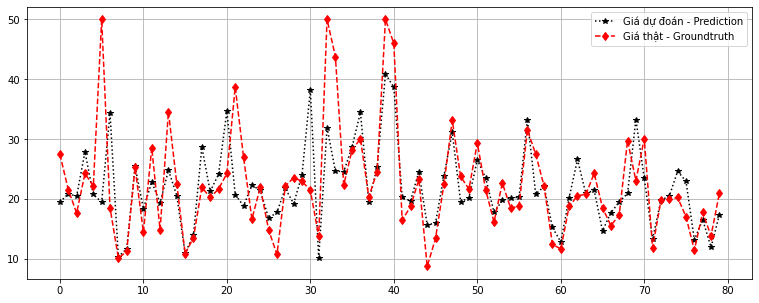

In [13]:
#Trực quan hóa kết quả dự đoán với kết quả groudtruth
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
plt.plot(y_test_predict[:80], marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test[:80], marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.legend()
plt.grid(True)

## THỰC HÀNH (LÀM THÊM)
---
Yêu cầu 1, 2 giống với bài thực hành 9

Yêu cầu 3:
1. Xây dựng mô hình KNN cho bài toán hồi quy (Simple Linear Regression) với thuộc tính có ảnh hưởng cao nhất tới thuộc tính Target. Xác định sai số RMSE và R2 trên tập Train và Test.
2. Xây dựng mô hình KNN cho bài toán hồi quy với tất các thuộc tính đầu vào (input). Xác định sai số RMSE và R2  trên tập Train và Test.

In [1]:
#{Sinh viên viết code ở đây}
#Khai báo các thư viện cần dùng
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**Yêu cầu 1:**
---
Sinh viên tìm hiểu về tập dữ liệu mẫu Diabetes Dataset của Sklearn (xác định các features đầu vào (input) và label đầu ra (target))

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes["target"] = diabetes.target
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [3]:
#Hiển thị 5 dòng dữ liệu đầu tiên:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
#Các đặc trưng thống kê của các thuộc tính độc lập (input):
df_diabetes[df_diabetes.columns].describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [5]:
# input
X_train = df_diabetes.drop(['target'], axis = 1)
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
#Quan sát các đặc trưng thống kê của Target (thuộc tính phụ thuộc)
df_diabetes[['target']].describe()

,target
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [7]:
# output
y_train = df_diabetes[['target']]
y_train

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


**Yêu cầu 2:**
---
* Trong tập dữ liệu Diabetes xác định thuộc tính có ảnh hưởng lớn nhất (hệ số tương quan cao nhất) tới thuộc tính target.
* Tách tập dữ liệu thành 2 phần Train – Test với tỷ lệ 75%-25%

<AxesSubplot:>

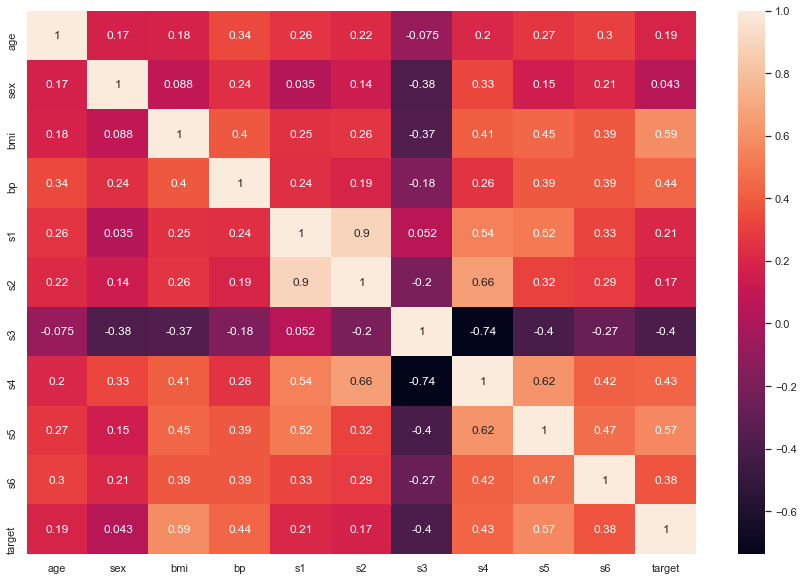

In [8]:
#Xác định mức độ ảnh hưởng của các thuộc tính tới Mức độ tiến triển của bệnh sau một năm đầu:
#Xác định hệ số tương quan trong tập dữ liệu

correlation_matrix = df_diabetes.corr().round(3)
# annot = True to print the values inside the square
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=correlation_matrix, annot=True)

Thuộc tính ảnh hưởng mạnh nhất tới Mức độ tiến triển của bệnh sau một năm đầu:

    * bmi (0.59): chỉ số khối cơ thể BMI của bệnh nhân - Tương quan thuận

#### Tách tập dữ liệu ra làm 2 phần dùng để huấn luyện và kiểm thử mô hình theo tỷ lệ (75% - 25%)
---

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.25, 
                                                    random_state=48)

print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 331
2. Kích thước tập Test    : 111


**Yêu cầu 3:**
---
1. Xây dựng mô hình KNN cho bài toán hồi quy (Simple Linear Regression) với thuộc tính có ảnh hưởng cao nhất tới thuộc tính Target. Xác định sai số RMSE và R2 trên tập Train và Test.
2. Xây dựng mô hình KNN cho bài toán hồi quy với tất các thuộc tính đầu vào (input). Xác định sai số RMSE và R2  trên tập Train và Test.

**1. Model KNN với một tham số: bmi**

In [10]:
#Dữ liệu tỷ lệ phần trăm chỉ số khối cơ thể BMI của bệnh nhân (bmi) 
#với Mức độ tiến triển của bệnh sau một năm đầu (target):
df_diabetes[['bmi','target']].head(10)

,bmi,target
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0
5,-0.040696,97.0
6,-0.047163,138.0
7,-0.001895,63.0
8,0.061696,110.0
9,0.039062,310.0


In [11]:
#Tách dữ liệu biến độc X(bmi) - Biến phụ thuộc Y(target) để xây dựng mô hình hồi quy
X_bmi = df_diabetes['bmi'].values

#Tách biến phụ thuộc:
y_target = df_diabetes['target'].values

#Chia tập dữ liệu Train - Test:
X_train, X_test, y_train, y_test = train_test_split(X_bmi, 
                                                    y_target, 
                                                    test_size=0.25, 
                                                    random_state=48)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 331
2. Kích thước tập Test    : 111


In [12]:
#Trường hợp với n = 7
model_1 = KNeighborsRegressor(n_neighbors=7)

#Huấn luyện model
model_1.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [13]:
#Đánh giá độ chính xác trên tập Train:
y_pred = model_1.predict(X_train)
y_pred = y_pred.reshape(-1,1)

#Tính các sai số:
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred)))
r2_train = r2_score(y_train, y_pred)

print('1. MÔ HÌNH KNN VỚI MỘT THAM SỐ: BMI')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")

print('*) Sai số RMSE = ',rmse_train)
print('*) Sai số R2   = ',r2_train)

# Đánh giá độ chính xác trên tập TEST:
y_pred =model_1.predict(X_test)
y_pred.reshape(1,-1)

#Tính các sai số:
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2_test = r2_score(y_test, y_pred)

print("\nĐộ chính xác của mô hình trên Kiểm thử:")
print("--------------------------------------------")
print('*) Sai số RMSE = ',rmse_test)
print('*) Sai số R2   = ',r2_test)

1. MÔ HÌNH KNN VỚI MỘT THAM SỐ: BMI
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
*) Sai số RMSE =  55.76816612697641
*) Sai số R2   =  0.4550294143240645

Độ chính xác của mô hình trên Kiểm thử:
--------------------------------------------
*) Sai số RMSE =  70.39527382011424
*) Sai số R2   =  0.20951191046536577


**2. Model KNN với tất các thuộc tính đầu vào**

In [14]:
#Đọc dữ liệu vào các độc lập và phụ thuộc
X_train = df_diabetes.iloc[:,:10].values
y_train = df_diabetes.iloc[:, -1].values

#Chia tập dữ liệu Train - Test:
X_train, X_test, y_train, y_test = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.25, 
                                                    random_state=48)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 331
2. Kích thước tập Test    : 111


In [15]:
#Trường hợp với n = 7
model_2 = KNeighborsRegressor(n_neighbors=7)

#Huấn luyện model
model_2.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [16]:
#Đánh giá độ chính xác trên tập Train:
y_pred = model_2.predict(X_train)

#Tính các sai số:
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred)))
r2_train = r2_score(y_train, y_pred)

print('2. MÔ HÌNH KNN VỚI TẤT CẢ CÁC THUỘC TÍNH ĐẦU VÀO')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")

print('*) Sai số RMSE = ',rmse_train)
print('*) Sai số R2   = ',r2_train)

# Đánh giá độ chính xác trên tập TEST:
y_pred = model_2.predict(X_test)

#Tính các sai số:
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2_test = r2_score(y_test, y_pred)

print("\nĐộ chính xác của mô hình trên Kiểm thử:")
print("--------------------------------------------")
print('*) Sai số RMSE = ',rmse_test)
print('*) Sai số R2   = ',r2_test)

2. MÔ HÌNH KNN VỚI TẤT CẢ CÁC THUỘC TÍNH ĐẦU VÀO
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
*) Sai số RMSE =  52.43669520603828
*) Sai số R2   =  0.5181953792745181

Độ chính xác của mô hình trên Kiểm thử:
--------------------------------------------
*) Sai số RMSE =  58.8698662385678
*) Sai số R2   =  0.4471664089112457
